# Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score,recall_score, precision_score, classification_report,auc, roc_curve
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\Code\Python\TH_Machine_Learning\diabetes_cleaned_by_T.csv")
data.shape 

(80522, 30)

In [15]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
one_hot_cols = ['race', 'gender','admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
               'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change','diabetesMed',]

columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

ordinal_col = ['age']

len(one_hot_cols),len(columns_to_plot),len(ordinal_col)

(20, 8, 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80522 entries, 0 to 80521
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      80522 non-null  object
 1   gender                    80522 non-null  object
 2   age                       80522 non-null  object
 3   admission_type_id         80522 non-null  object
 4   discharge_disposition_id  80522 non-null  object
 5   admission_source_id       80522 non-null  object
 6   time_in_hospital          80522 non-null  int64 
 7   medical_specialty         80522 non-null  object
 8   num_lab_procedures        80522 non-null  int64 
 9   num_procedures            80522 non-null  int64 
 10  num_medications           80522 non-null  int64 
 11  number_outpatient         80522 non-null  int64 
 12  number_emergency          80522 non-null  int64 
 13  number_inpatient          80522 non-null  int64 
 14  diag_1                

In [17]:
int_data = data.select_dtypes(include=['int64'])
object_data = data.select_dtypes(include='object')

In [18]:
# split data based on label
label_0 = data.loc[data['readmitted']==0]
label_1 = data.loc[data['readmitted']==1]

In [9]:
data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,80522.000000,80522.000000,80522.000000,80522.000000,80522.000000,80522.000000,80522.000000,80522.000000,80522.000000
mean,4.358188,43.027843,1.394402,15.823452,0.302067,0.139900,0.371290,7.307034,0.141042
std,2.977099,19.850545,1.736031,8.261124,1.109664,0.709426,1.013701,1.972741,0.348067
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,64.000000,21.000000,16.000000,1.000000


In [10]:
label_1.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.000000,11357.0
mean,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789,1.0
std,3.028165,19.276087,1.635992,8.096696,1.302788,1.370384,1.954577,1.773477,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2.000000,33.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,1.0
50%,4.000000,45.000000,1.000000,16.000000,0.000000,0.000000,0.000000,9.000000,1.0
75%,6.000000,58.000000,2.000000,21.000000,0.000000,0.000000,2.000000,9.000000,1.0
max,14.000000,132.000000,6.000000,81.000000,40.000000,64.000000,21.000000,16.000000,1.0


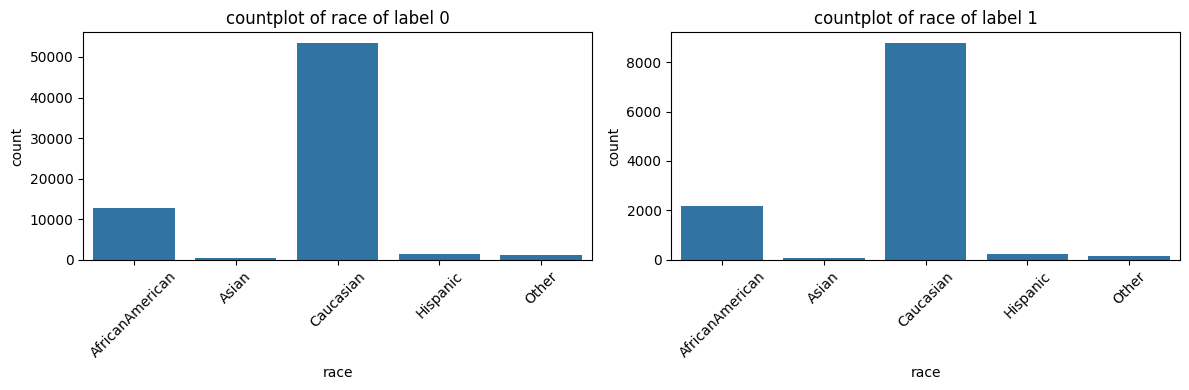

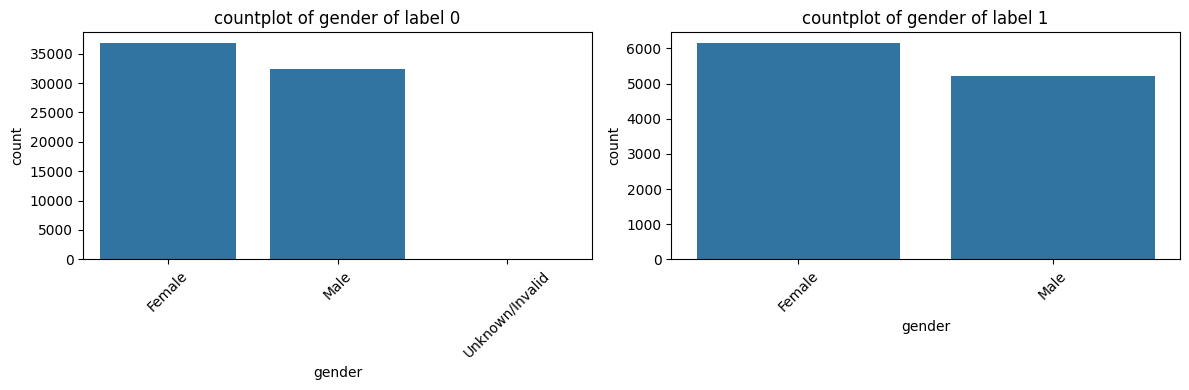

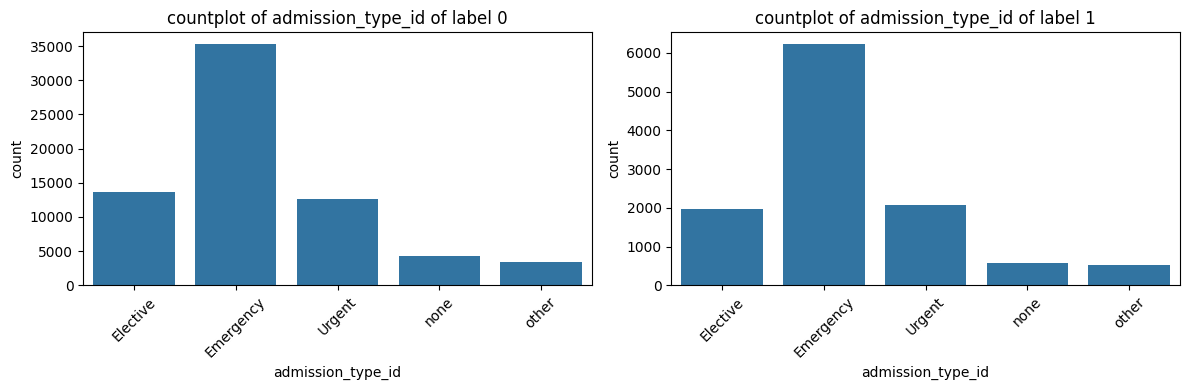

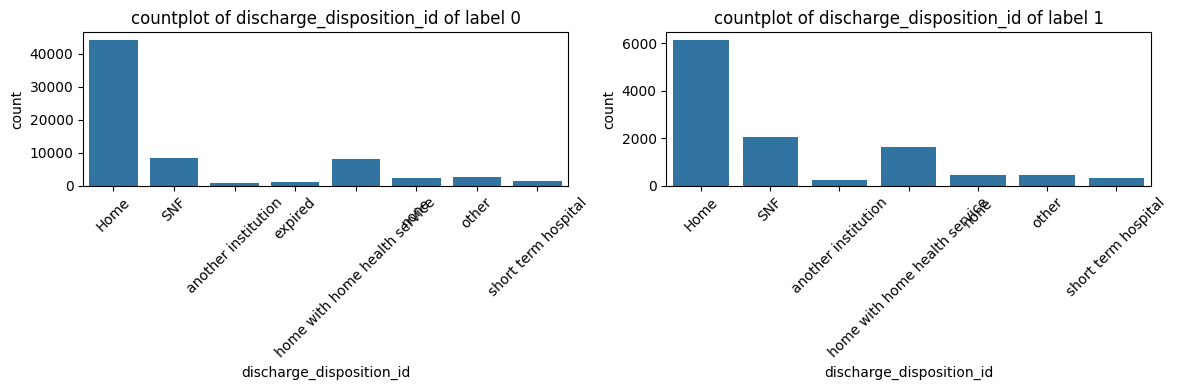

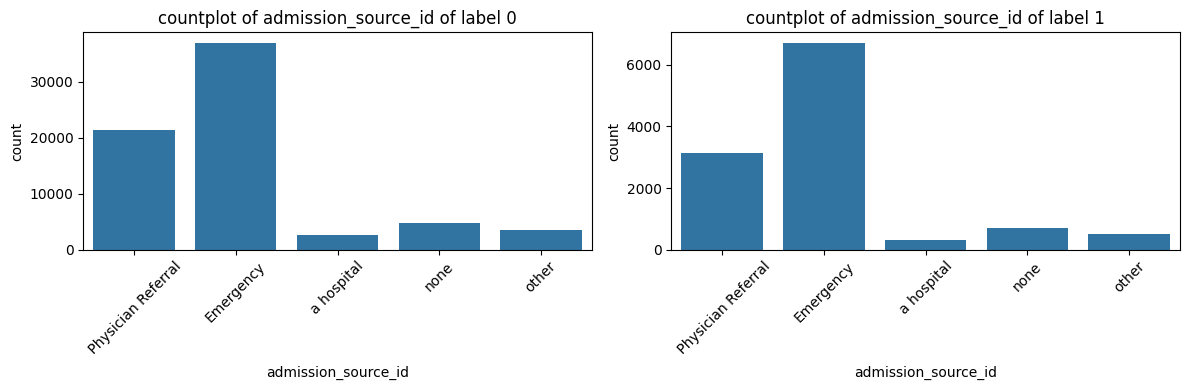

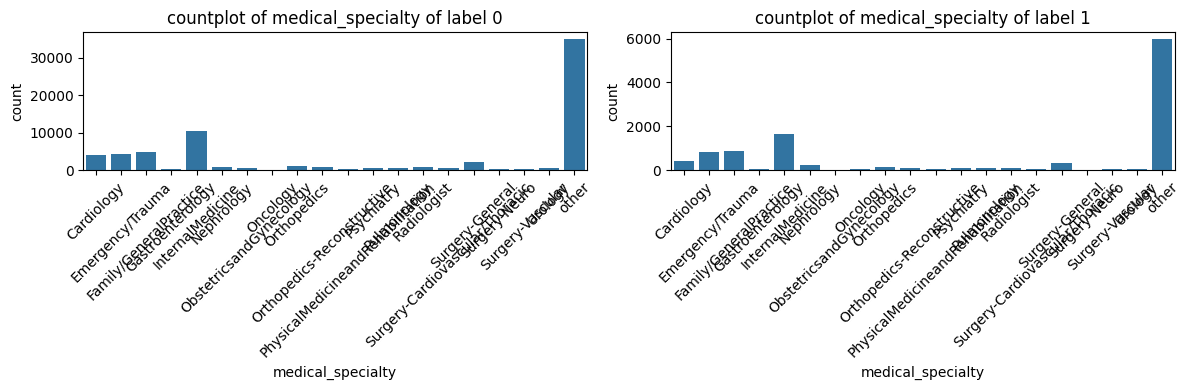

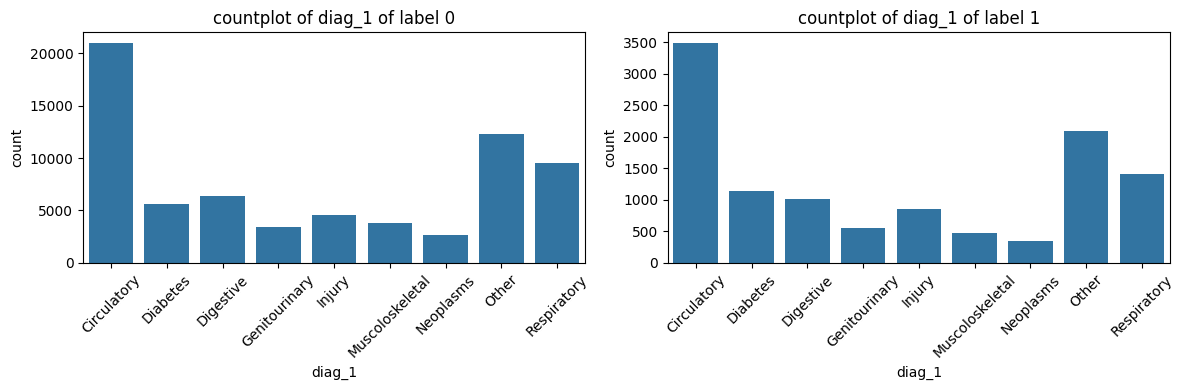

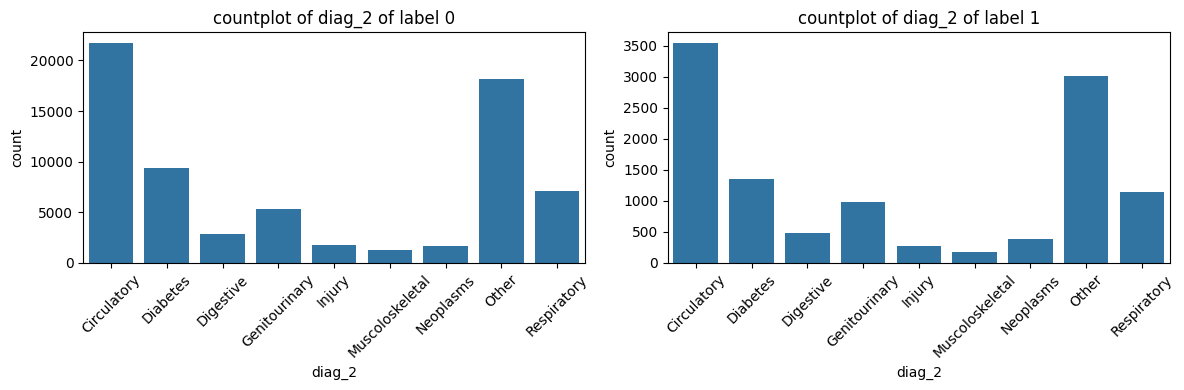

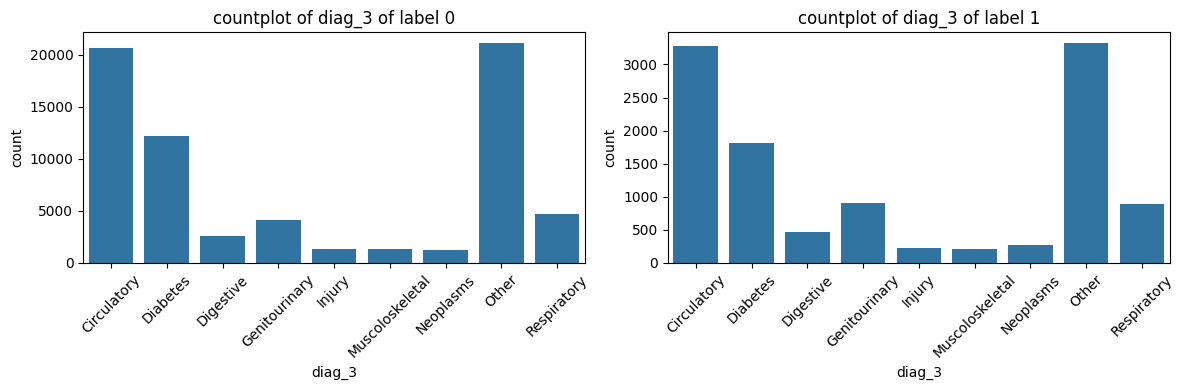

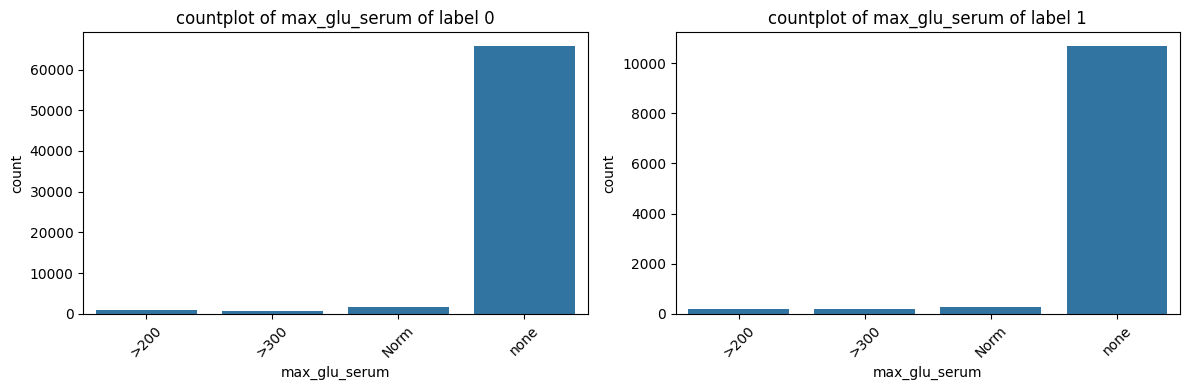

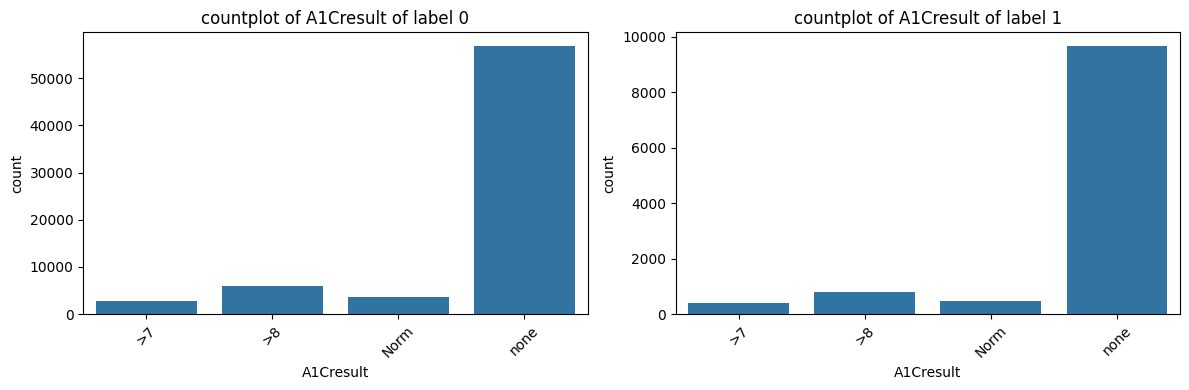

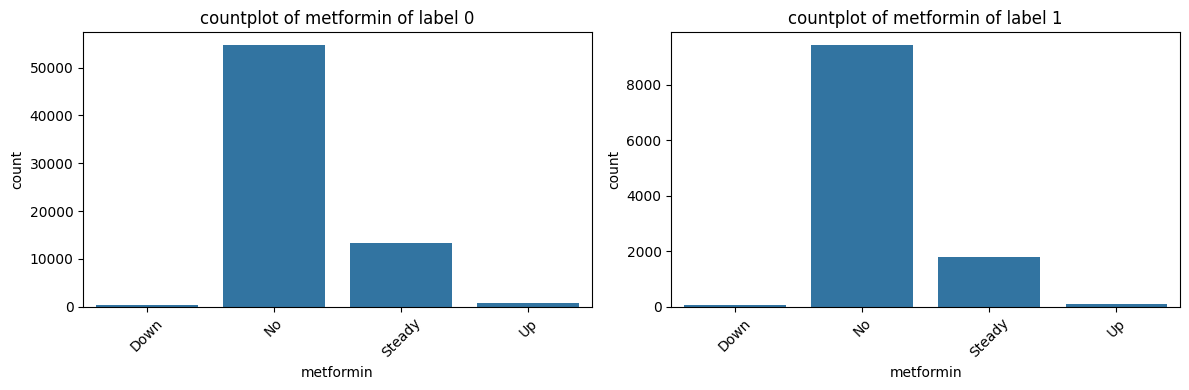

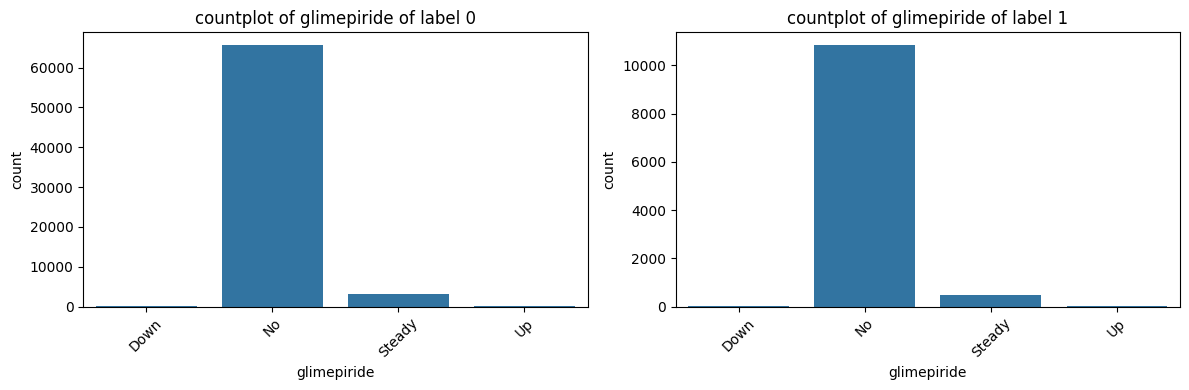

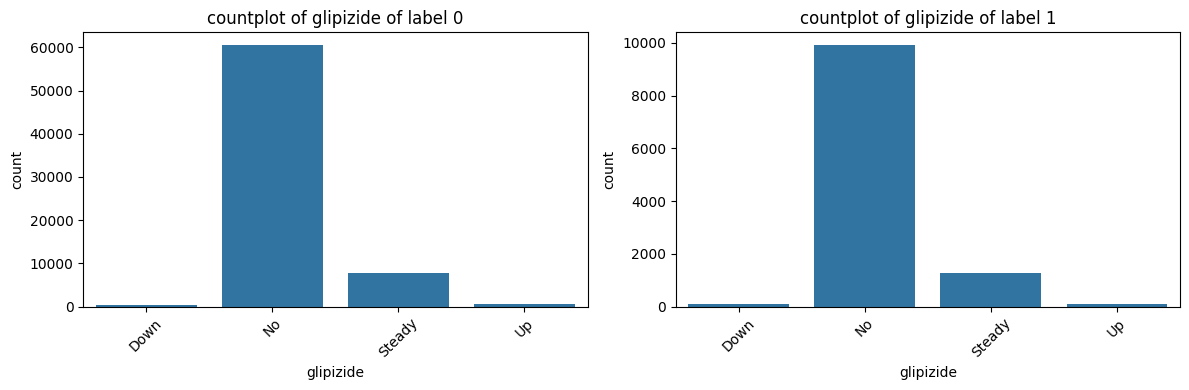

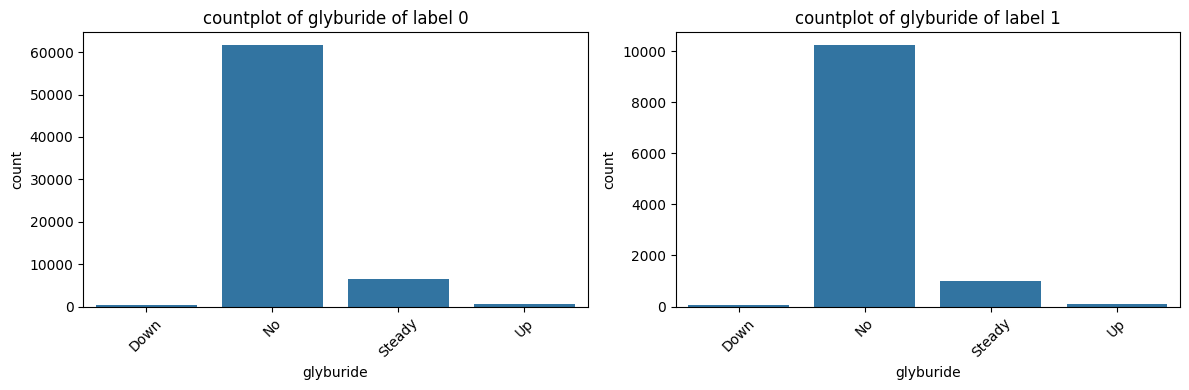

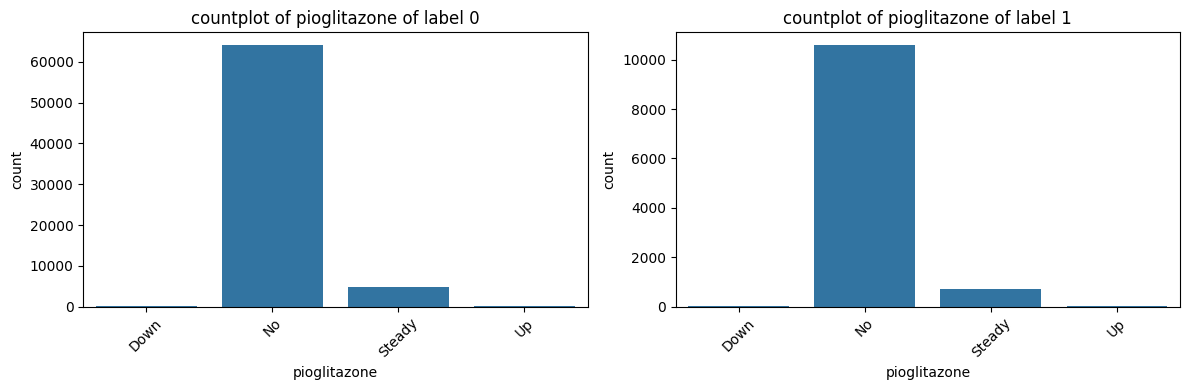

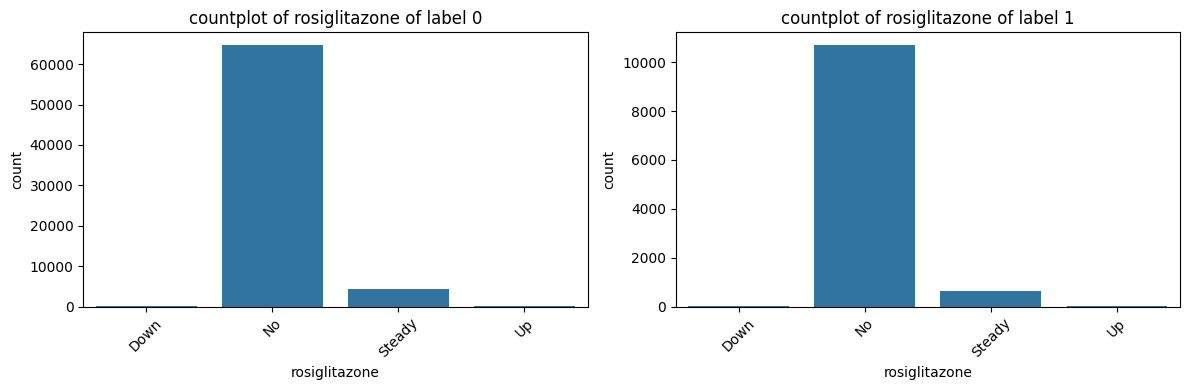

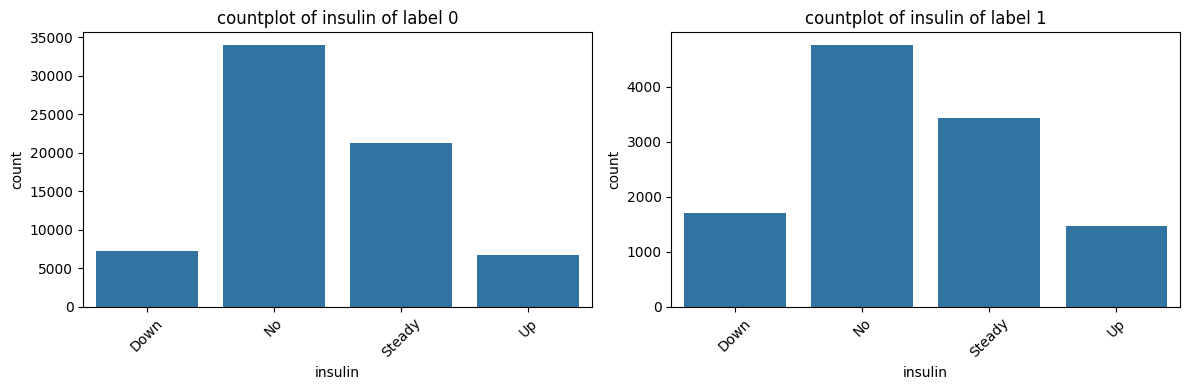

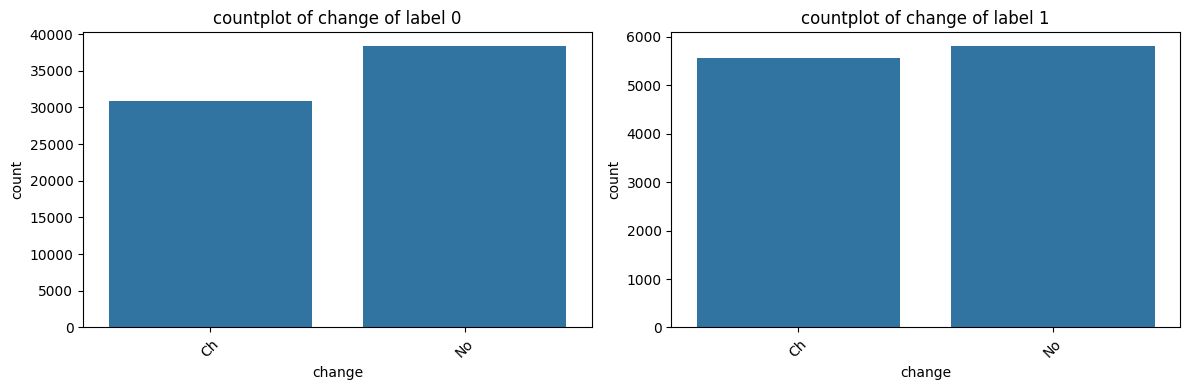

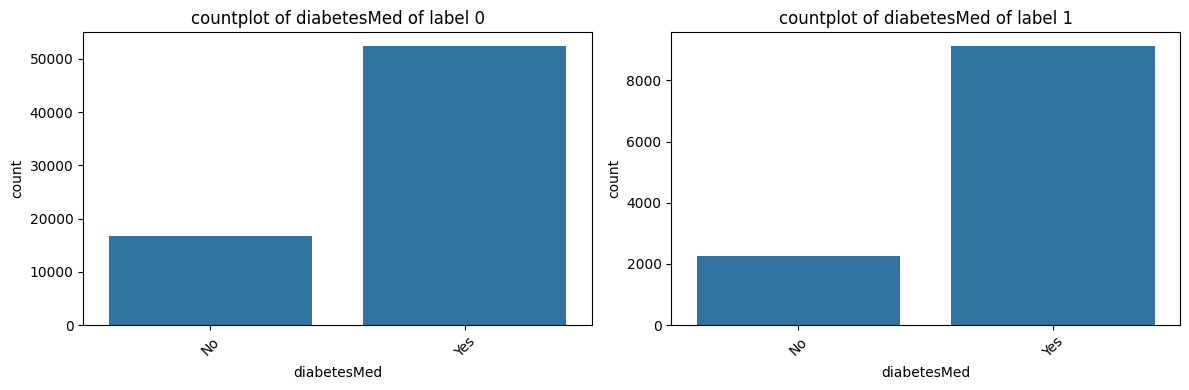

In [20]:
# Plot to understand the distribution of features for each label
for col in one_hot_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    temp_0 = label_0.sort_values(by=col)
    sns.countplot(x=col, data=temp_0)
    plt.title(f'countplot of {col} of label 0')
    plt.tight_layout()
    plt.xticks(rotation=45)

    plt.subplot(1,2,2) 
    temp_1 = label_1.sort_values(by=col)
    sns.countplot(x=col, data=temp_1)
    plt.title(f'countplot of {col} of label 1')
    plt.tight_layout()
    plt.xticks(rotation=45)

- Overall, the distributions of the features for the two labels are similar

# Split data

To avoid data leakage during manipulating data

In [8]:
# split data in the ratio 8:2
train_set, test_set = train_test_split(data,test_size=0.2)
train_set.shape, test_set.shape

((64417, 30), (16105, 30))

# Feature selection

## Encoding data

In [22]:
ordinal_encoder1 = OrdinalEncoder()
ordinal_encoder2 = OrdinalEncoder(categories=[['<30', '[30-60)', '[60-100)']])

column_transformer = ColumnTransformer(
    transformers=[
        ('ordinal1', ordinal_encoder1, one_hot_cols),
        ('ordinal2', ordinal_encoder2, ordinal_col)
    ],
    remainder='passthrough'
)

df_encoded = column_transformer.fit_transform(train_set)

encoded_columns = column_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

## Implement feature selection

In [23]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
# add readmitted for further calculating
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','readmitted']

cate_cols = set(data.columns.tolist()) ^ set(num_cols)


In [25]:
selected_encoded_cols = []
for col_encoded in df_encoded.columns:
    for col in cate_cols:
        if col in col_encoded:
            selected_encoded_cols.append(col_encoded)

In [26]:
selected_encoded_cols

['ordinal1__race',
 'ordinal1__gender',
 'ordinal1__admission_type_id',
 'ordinal1__discharge_disposition_id',
 'ordinal1__admission_source_id',
 'ordinal1__medical_specialty',
 'ordinal1__diag_1',
 'ordinal1__diag_2',
 'ordinal1__diag_3',
 'ordinal1__max_glu_serum',
 'ordinal1__A1Cresult',
 'ordinal1__metformin',
 'ordinal1__glimepiride',
 'ordinal1__glipizide',
 'ordinal1__glyburide',
 'ordinal1__pioglitazone',
 'ordinal1__rosiglitazone',
 'ordinal1__insulin',
 'ordinal1__change',
 'ordinal1__diabetesMed',
 'ordinal2__age']

### Select categorical features

['ordinal1__discharge_disposition_id',
 'ordinal1__medical_specialty',
 'ordinal1__diag_1',
 'ordinal1__diag_2',
 'ordinal1__diag_3',
 'ordinal1__A1Cresult',
 'ordinal1__metformin',
 'ordinal1__change',
 'ordinal1__diabetesMed',
 'ordinal2__age']

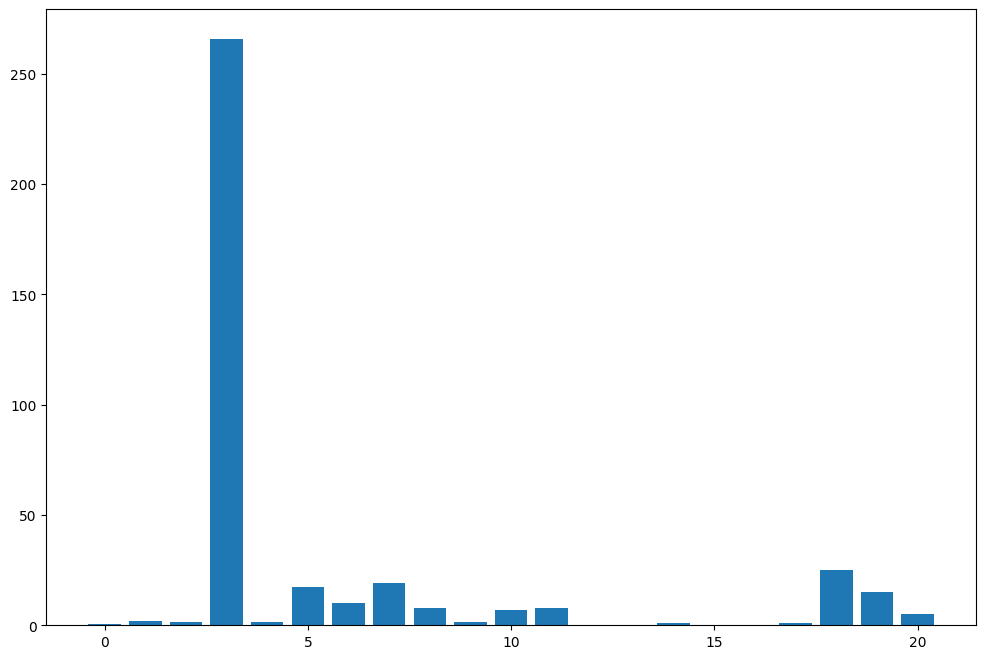

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X = df_encoded[selected_encoded_cols]
y = df_encoded['remainder__readmitted']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_dev)

plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

selected_cate_cols = [df_encoded.columns[i] for i in range(len(fs.scores_)) if fs.scores_[i]>5]

selected_cate_cols

### Select numerical features

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = data
df['readmitted'] = df['readmitted'].astype('category')
def anova_feature_selection(df, target_column):
    anova_results = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        if column != target_column:
            model = ols(f'{column} ~ C({target_column})', data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            p_value = anova_table["PR(>F)"][0]
            anova_results[column] = p_value
    return anova_results

anova_results = anova_feature_selection(df, 'readmitted')

significant_features = [feature for feature, p_value in anova_results.items() if p_value < 0.05]

print("Significant features:", significant_features)
print("ANOVA Results (p-values):", anova_results)


Significant features: ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
ANOVA Results (p-values): {'time_in_hospital': 1.4006923852604573e-56, 'num_lab_procedures': 3.877464184334864e-12, 'num_procedures': 5.473649971766925e-14, 'num_medications': 4.101660856700317e-51, 'number_outpatient': 2.0274138473994172e-44, 'number_emergency': 4.031255432323169e-274, 'number_inpatient': 0.0, 'number_diagnoses': 2.6504054324306387e-112}


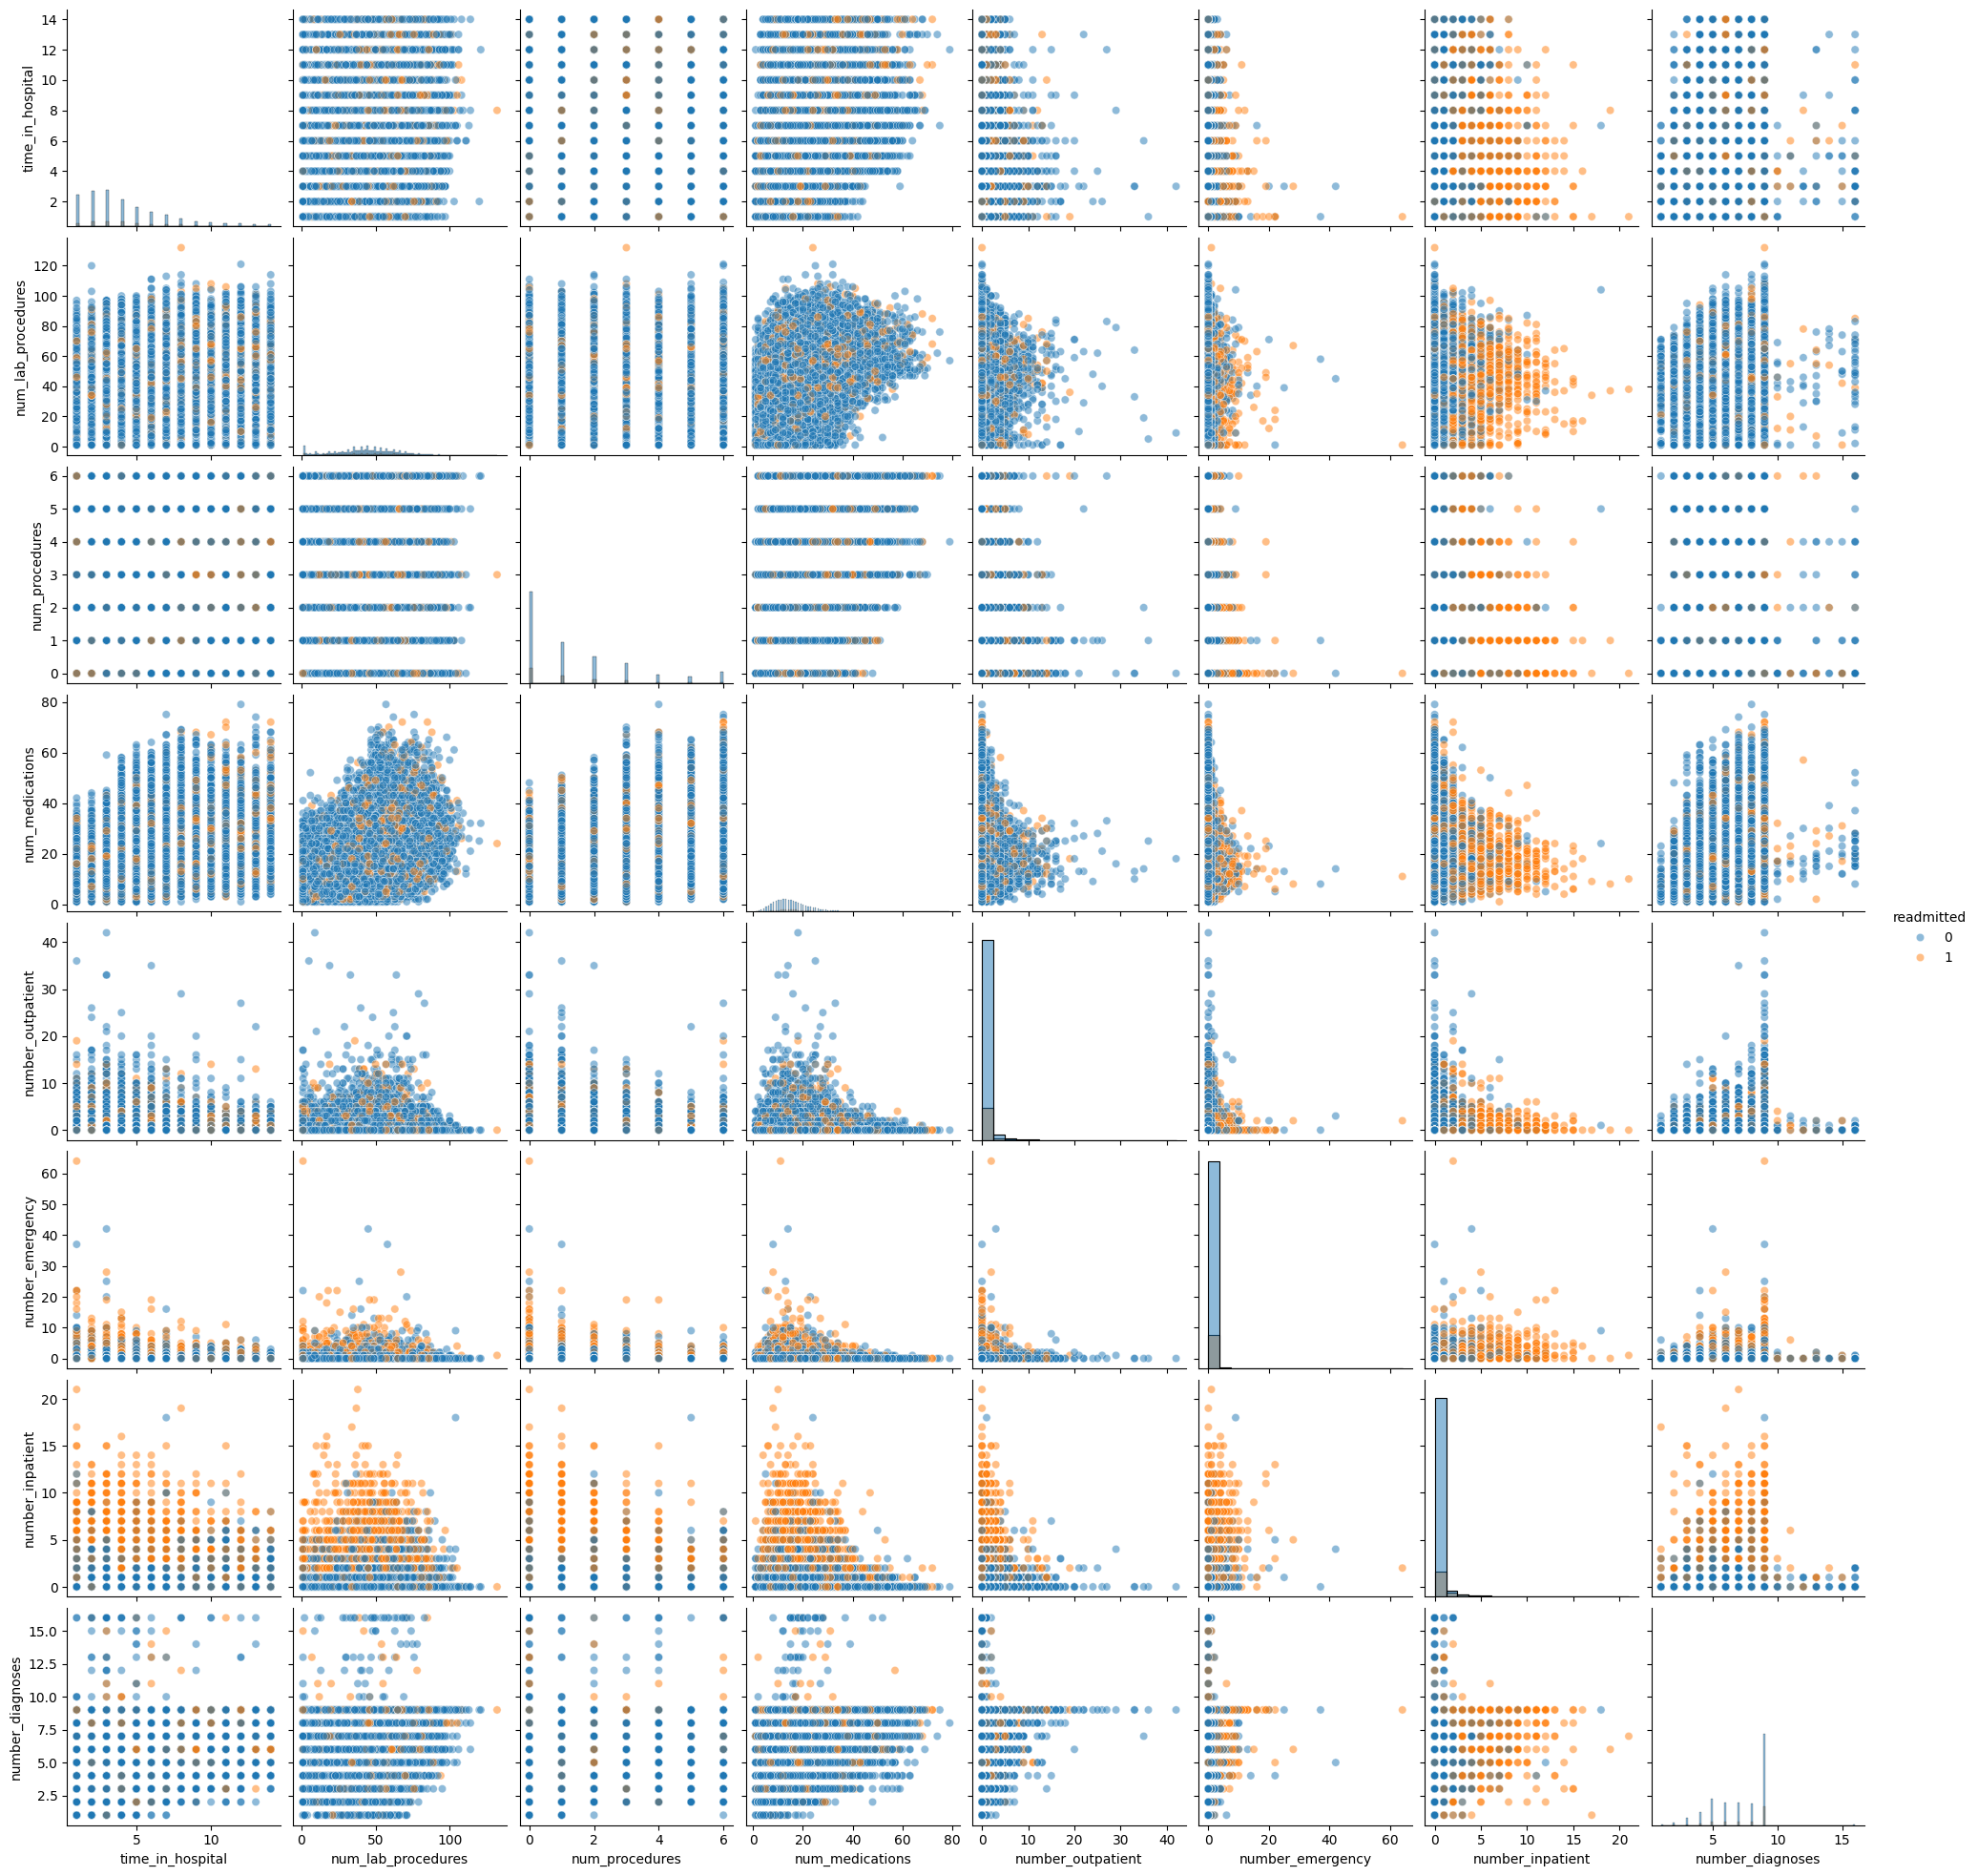

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


g= sns.pairplot(train_set[num_cols],hue = 'readmitted', diag_kind= 'hist',
             vars=data[num_cols].columns[:-1],
             plot_kws=dict(alpha=0.5), 
             diag_kws=dict(alpha=0.5))
plt.show()

- Based on the scatter plot, `number_inpatient` shows that it is quite separate between the two classes and shows a trend.

In [13]:
useful_feature = ['medical_specialty','discharge_disposition_id','diag_1','diag_2','diag_3','A1Cresult','metformin',
                'change','diabetesMed','age','number_inpatient','readmitted'] + significant_features

- *useful_feature* is selected based on the Chi-squared method and the dispersion of feature pairs in the scatter chart

# Undersampling data

In [61]:
official_data = train_set[useful_feature]

In [62]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, ['medical_specialty','discharge_disposition_id','diag_1','diag_2',
                                    'diag_3','A1Cresult','metformin','change','diabetesMed','age'])                     
    ],
    remainder='passthrough'
)

df_encoded = column_transformer.fit_transform(official_data)

encoded_columns = column_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

In [63]:
X = df_encoded.drop('remainder__readmitted',axis=1)
y = df_encoded['remainder__readmitted']

In [38]:
Counter(y)

Counter({0.0: 55339, 1.0: 9078})

In [39]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3,max_iter=100)

X_resampled, y_resampled = renn.fit_resample(X, y)

Counter(y_resampled)

Counter({0.0: 35686, 1.0: 9078})

# Modeling

In [71]:
# split data
X_train,X_dev, y_train, y_dev  = train_test_split(X_resampled,y_resampled, test_size=0.25, random_state=42)

In [72]:
X_train.shape

(33573, 69)

## Random Forest

In [73]:
rf = RandomForestClassifier(class_weight='balanced',n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_dev)
print(classification_report(y_dev,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      8889
         1.0       0.81      0.34      0.48      2302

    accuracy                           0.85     11191
   macro avg       0.83      0.66      0.70     11191
weighted avg       0.84      0.85      0.82     11191



## Evaluate model performance

In [21]:
from sklearn.model_selection import StratifiedKFold, learning_curve

def plot_learning_curve(estimator, X, y, scorer, title="Learning Curve"):
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=stratified_kfold, scoring=scorer, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

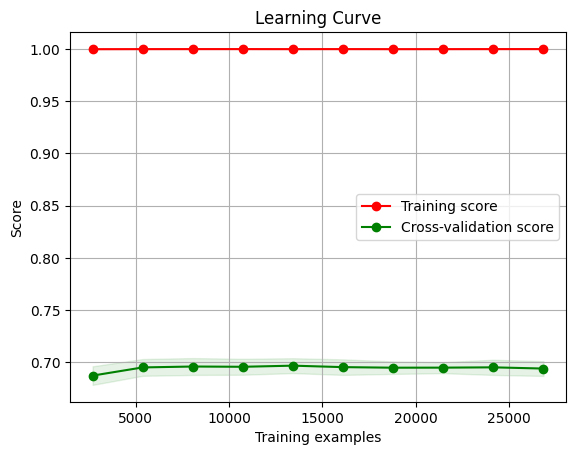

In [74]:
# plot to diagnose model behavior and identify potential issues like underfitting or overfitting
base_rf_plot = plot_learning_curve(rf, X_train, y_train, 'f1_macro', title="Learning Curve")

**Observations**:
- Training Score: The training score is very high, remaining consistently 1.0. This indicates that the model is performing exceptionally well on the training data.
- Cross-validation Score: The cross-validation score starts low and gradually increases as the number of training examples increases. This suggests that the model is learning and improving its performance on unseen data as more training data is provided.
- Gap between Curves: There is a significant gap between the training and cross-validation scores, which suggests that the model is overfitting. The model performs very well on the training data but struggles to perform equally well on the validation data.

## Fine-tune hyperparameter of model

In [131]:
rf2 = RandomForestClassifier(
    class_weight='balanced',       
    n_estimators=100,             
    max_depth=8,                  
    max_features='sqrt',           
    min_samples_split=20,          
    min_samples_leaf=10, 
    max_leaf_nodes=3,           
    bootstrap=True,               
    random_state=42                
)
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_dev)
print(classification_report(y_dev,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      8889
         1.0       0.53      0.51      0.52      2302

    accuracy                           0.80     11191
   macro avg       0.70      0.70      0.70     11191
weighted avg       0.80      0.80      0.80     11191



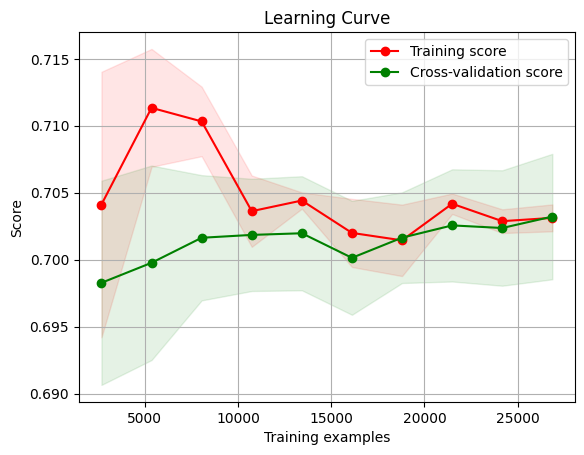

In [132]:
rf2_fine_tuned = plot_learning_curve(rf2, X_train, y_train, 'f1_macro', title="Learning Curve")

**Observations**:

- Training Score: The training score starts around 0.704 then peaks at 5000 training examples and falls dramatically to 0.703 as the number of training examples increases. This indicates the model is learning from the training data and improving its performance.
- Cross-Validation Score: The cross-validation score starts around 0.698 then gradually increase to 0.703. This is a positive sign, as the model is performing well but too much stable on unseen data (cross-validation).
- Gap between Curves: There's a relatively small gap between the training score and the cross-validation score, which suggests mild overfitting might be present. However, the gap is not significant as the number of training examples, and the overall performance indicates reasonable generalization.

In [133]:
rf3 = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=360,             
    max_depth=4,                  
    max_features='sqrt',          
    min_samples_split=60,         
    min_samples_leaf=50,  
    max_leaf_nodes=3,         
    bootstrap=True,               
    random_state=42
)
rf3.fit(X_train, y_train)

y_pred = rf3.predict(X_dev)
print(classification_report(y_dev,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      8889
         1.0       0.54      0.51      0.52      2302

    accuracy                           0.81     11191
   macro avg       0.70      0.70      0.70     11191
weighted avg       0.80      0.81      0.81     11191



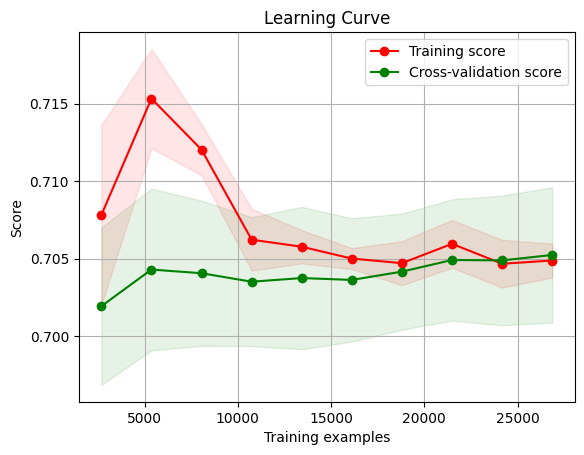

In [134]:
rf3_fine_tuned_by_RENN = plot_learning_curve(rf3, X_train, y_train, 'f1_macro', title="Learning Curve")

**Observations**:  

- Training Score: The training score starts around 0.707 then reaches the highest scores and falls slightly to 0.705 in the last stage.
- Cross-Validation Score: The cross-validation score starts around 0.703 then increases and fluctuates around 0.7055. This is a positive sign, as the model is performing well and stably on unseen data (cross-validation).
- Gap between Curves: There's a small gap between the training score and the cross-validation score, which suggests mild overfitting might be present. However, the gap is not significant as the training examples reach around 24000. It's a sign that adding more training examples can eliminate overfitting and improve model performance

**Conclusion**
- The learning curve still shows a small gap between training and cross-validation scores, indicating that there is a slight degree of overfitting remaining. However, this is much improved compared to the initial stages.
- Need more data for training to improve the performance of model and avoid overfitting.
- Perhaps I should consider changing the undersampling methods.

## Changing undersampling method: OSS

In [14]:
official_data = train_set[useful_feature]

In [15]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, ['medical_specialty','discharge_disposition_id','diag_1','diag_2',
                                    'diag_3','A1Cresult','metformin','change','diabetesMed','age'])                       
    ],
    remainder='passthrough'
)

df_encoded = column_transformer.fit_transform(official_data)

encoded_columns = column_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
X = df_encoded.drop('remainder__readmitted',axis=1)
y = df_encoded['remainder__readmitted']
Counter(y)

Counter({0.0: 55284, 1.0: 9133})

In [17]:
from imblearn.under_sampling import OneSidedSelection

for i in range(5):
    undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200,sampling_strategy='not minority')
    X, y = undersample.fit_resample(X, y)
    counter = Counter(y)
    print(counter)
X_resampled = X
y_resampled = y

Counter({0.0: 51637, 1.0: 9133})
Counter({0.0: 49786, 1.0: 9133})
Counter({0.0: 48342, 1.0: 9133})
Counter({0.0: 47062, 1.0: 9133})
Counter({0.0: 45861, 1.0: 9133})


## Modeling

In [19]:
X_train, X_dev, y_train, y_dev = train_test_split(X_resampled,y_resampled,test_size=0.25,random_state=42)

In [20]:
rf3_OSS = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=400,             
    max_depth=5,                  
    max_features='sqrt',          
    min_samples_split=60,         
    min_samples_leaf=60,  
    max_leaf_nodes=3,         
    bootstrap=True,               
    random_state=42
)
rf3_OSS.fit(X_train, y_train)
pred = rf3_OSS.predict(X_dev)

print(classification_report(y_dev, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86     11461
         1.0       0.38      0.50      0.43      2288

    accuracy                           0.78     13749
   macro avg       0.64      0.67      0.65     13749
weighted avg       0.81      0.78      0.79     13749



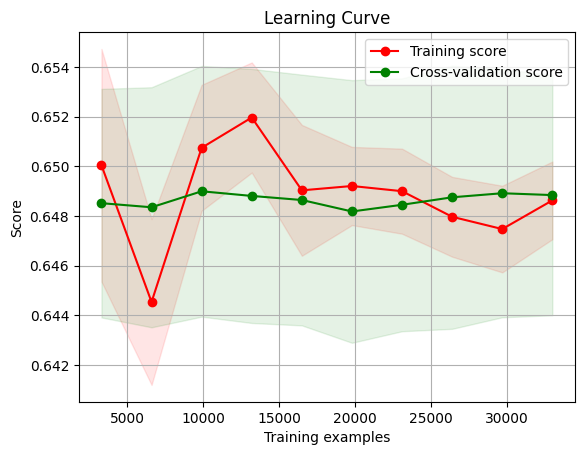

In [22]:
rf4_fine_tuned_OSS = plot_learning_curve(rf3_OSS, X_train, y_train, 'f1_macro', title="Learning Curve")

**Conclusion**  
- Undersampling by OSS has poorer performance compared to RENN(0.649 < 0.705). Therefore, the final model I will choose is rf3. This model is stable on cross-validation data, although there’s a sign of overfitting. However, this issue could be resolved by adding more training data

# Predict on unseen data

## Preprocessing test set

In [48]:
official_test_data = test_set[useful_feature]

In [49]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, ['medical_specialty','discharge_disposition_id','diag_1','diag_2',
                                    'diag_3','A1Cresult','metformin','change','diabetesMed','age'])
                                
    ],
    remainder='passthrough'
)

df_encoded = column_transformer.fit_transform(official_test_data)

encoded_columns = column_transformer.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)

In [50]:
df_encoded

,onehot__medical_specialty_Emergency/Trauma,onehot__medical_specialty_Family/GeneralPractice,onehot__medical_specialty_Gastroenterology,onehot__medical_specialty_InternalMedicine,onehot__medical_specialty_Nephrology,onehot__medical_specialty_ObstetricsandGynecology,onehot__medical_specialty_Oncology,onehot__medical_specialty_Orthopedics,onehot__medical_specialty_Orthopedics-Reconstructive,onehot__medical_specialty_PhysicalMedicineandRehabilitation,...,remainder__number_inpatient,remainder__readmitted,remainder__time_in_hospital,remainder__num_lab_procedures,remainder__num_procedures,remainder__num_medications,remainder__number_outpatient,remainder__number_emergency,remainder__number_inpatient,remainder__number_diagnoses
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,39.0,0.0,8.0,1.0,0.0,0.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,11.0,2.0,29.0,0.0,0.0,0.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,2.0,0.0,15.0,0.0,0.0,0.0,9.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,47.0,0.0,8.0,0.0,0.0,0.0,5.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.0,63.0,0.0,24.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,64.0,0.0,18.0,0.0,0.0,0.0,9.0
16101,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,85.0,2.0,20.0,0.0,0.0,0.0,9.0
16102,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,50.0,0.0,5.0,0.0,0.0,0.0,6.0
16103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,70.0,3.0,17.0,0.0,0.0,0.0,9.0


In [ ]:
X_test = df_encoded.drop('remainder__readmitted',axis=1)
y_test = df_encoded['remainder__readmitted']

## Predict on unseen data by `rf3`

In [142]:
y_pred = rf3.predict(X_test)

# result of model on unseen data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     13826
         1.0       0.33      0.49      0.40      2279

    accuracy                           0.79     16105
   macro avg       0.62      0.66      0.63     16105
weighted avg       0.83      0.79      0.80     16105

